## Lead Scoring Case Study
X-Education is an education company sells online Education courses to professionals and marketing through online advertisements.  Company gets information through different channels and if candidates enquring with certain education level it calls lead. Typically lead conversion is 30% of certain education. Company identifying Hot Leads on certain criteria also. Lead conversion ratio is lesser than number of enrollment. comapny given Target to achieve 80% of total enrollment

#### Goals of the Case Study
- Building logistics regression model to finding leads for Company and help to achieve potential targets.
- Alternative approach should be ready in case Company's requirement changes in futures should be flexible.

In [2]:
# Importing the NumPy and Pandas packages
import numpy as np
import pandas as pd

#import visualization libraries

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

#import stats library
from scipy import stats
import statsmodels.api as sm

#import sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import classification_report,recall_score,roc_auc_score,roc_curve,accuracy_score,precision_score,precision_recall_curve,confusion_matrix
from sklearn.preprocessing import LabelEncoder


#import miscellaneous libraries
pd.set_option("display.max_columns",None)
pd.set_option("display.max_colwidth",200)

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

### Importing the "Leads" Dataset

In [4]:
# Read the dataset
leads = pd.read_csv("Leads.csv")

In [5]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [6]:
#Checking the Shape of dataset
leads.shape

(9240, 37)

In [7]:
# Inspecting the different columns in the dataset
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [8]:
# Checking the summary of the dataset
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [9]:
# Checking the info to see the types of the feature variables and the null values present
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

It seems that there are quite a few categorical variables present in this dataset for which we will need to create dummy variables. Also, there are a lot of null values present as well, so we will need to treat them accordingly.

### Data Cleaning

In [12]:
# Checking the number of missing values in each column
leads.isnull().sum().sort_values(ascending=False)

Lead Quality                                     4767
Asymmetrique Activity Index                      4218
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
I agree to pay the amount th

It is clearly seen there are a lot of columns which have high number of missing values. Clearly, these columns are not useful. Since, there are 9000 datapoints in our dataframe, let's eliminate the columns having greater than 3000 missing values as they are of no use to us.

In [14]:
# Droping all the columns in which greater than 3000 null values are present.
for c in leads.columns:
    if leads[c].isnull().sum()>3000:
        leads.drop(c, axis=1,inplace=True)

In [15]:
leads.isnull().sum().sort_values(ascending=False)

What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Get updates on DM Content                           0
Newspaper                                           0
I agree to pay the amount through cheque            0
A free copy of Mastering The Interview              0
Update me on Supply Chain Content                   0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement       

In [16]:
#checking value counts of "City" column
leads['City'].value_counts(dropna=False)

City
Mumbai                         3222
Select                         2249
NaN                            1420
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

Mumbai has highest numbers of leads

As you might be able to interpret, the variable City won't be of any use in our analysis. So it's best that we drop it.

In [18]:
# dropping the "City" feature
leads.drop(['City'], axis = 1, inplace = True)

In [19]:
#checking value counts of "Country" column
leads['Country'].value_counts(dropna=False)

Country
India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switze

Highest number of leads from INDIA

In [21]:
# dropping the "Country" feature
leads.drop(['Country'], axis = 1, inplace = True)

In [22]:
#Now checking the percentage of missing values in each column
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [23]:
# Checking the number of null values again
leads.isnull().sum().sort_values(ascending=False)

What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
How did you hear about X Education               2207
Specialization                                   1438
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Get updates on DM Content                           0
Update me on Supply Chain Content                   0
X Education Forums                                  0
I agree to pay the amount through cheque            0
A free copy of Mastering The Interview              0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement                               0
Newspaper                                           0
Prospect ID                 

Visualizing the features with Select values

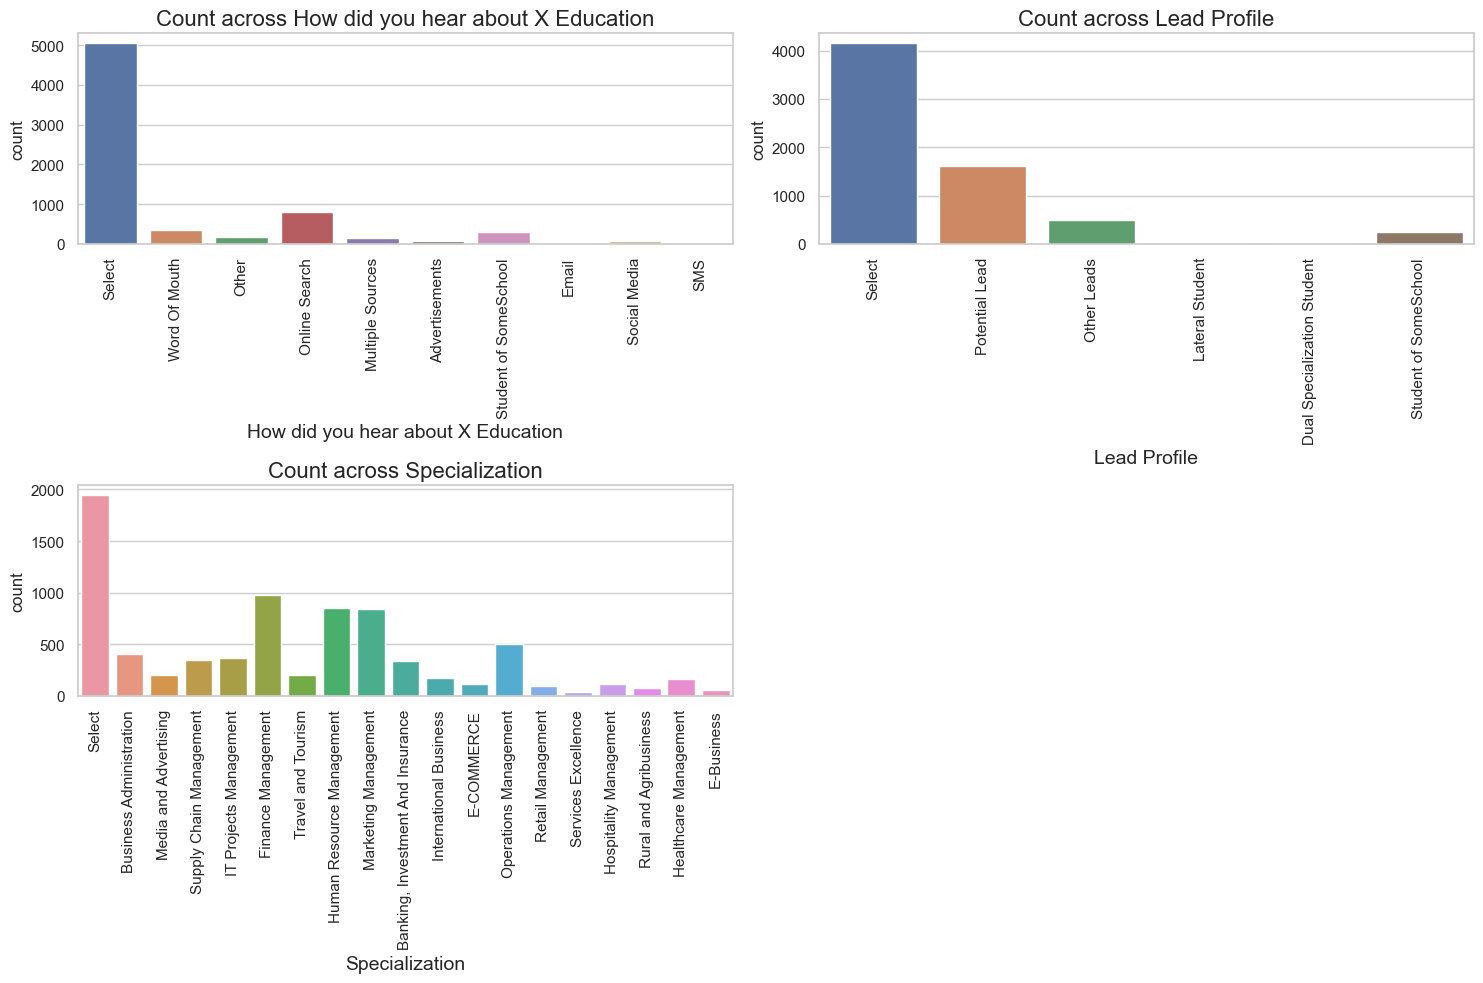

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'leads' is your DataFrame containing the columns to plot
def countplot(x, fig):
    plt.subplot(2, 2, fig)
    sns.countplot(x=x, data=leads)
    plt.title('Count across ' + x, size=16)
    plt.xlabel(x, size=14)
    plt.xticks(rotation=90)

plt.figure(figsize=(15, 10))

# Pass the column names that exist in the 'leads' DataFrame
countplot('How did you hear about X Education', 1)
countplot('Lead Profile', 2)
countplot('Specialization', 3)

plt.tight_layout()
plt.show()

There are a few columns in which there is a level called 'Select' which basically means that the student had not selected the option for that particular column which is why it shows 'Select'. These values are as good as missing values and hence we need to identify the value counts of the level 'Select' in all the columns that it is present.

In [27]:
# checking the value counts of all the columns
for c in leads:
    print(leads[c].astype('category').value_counts())
    print('___________________________________________________')

Prospect ID
000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: count, Length: 9240, dtype: int64
___________________________________________________
Lead Number
579533    1
629593    1
630390    1
630403    1
630405    1
         ..
602534    1
602540    1
602557    1
602561    1
660737    1
Name: count, Length: 9240, dtype: int64
___________________________________________________
Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64


The following three columns now have the level 'Select'. Let's check them once again.


In [29]:
leads['Lead Profile'].astype('category').value_counts()

Lead Profile
Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: count, dtype: int64

In [30]:
leads['How did you hear about X Education'].value_counts()

How did you hear about X Education
Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: count, dtype: int64

In [31]:
leads['Specialization'].value_counts()

Specialization
Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

### Visualizing the features

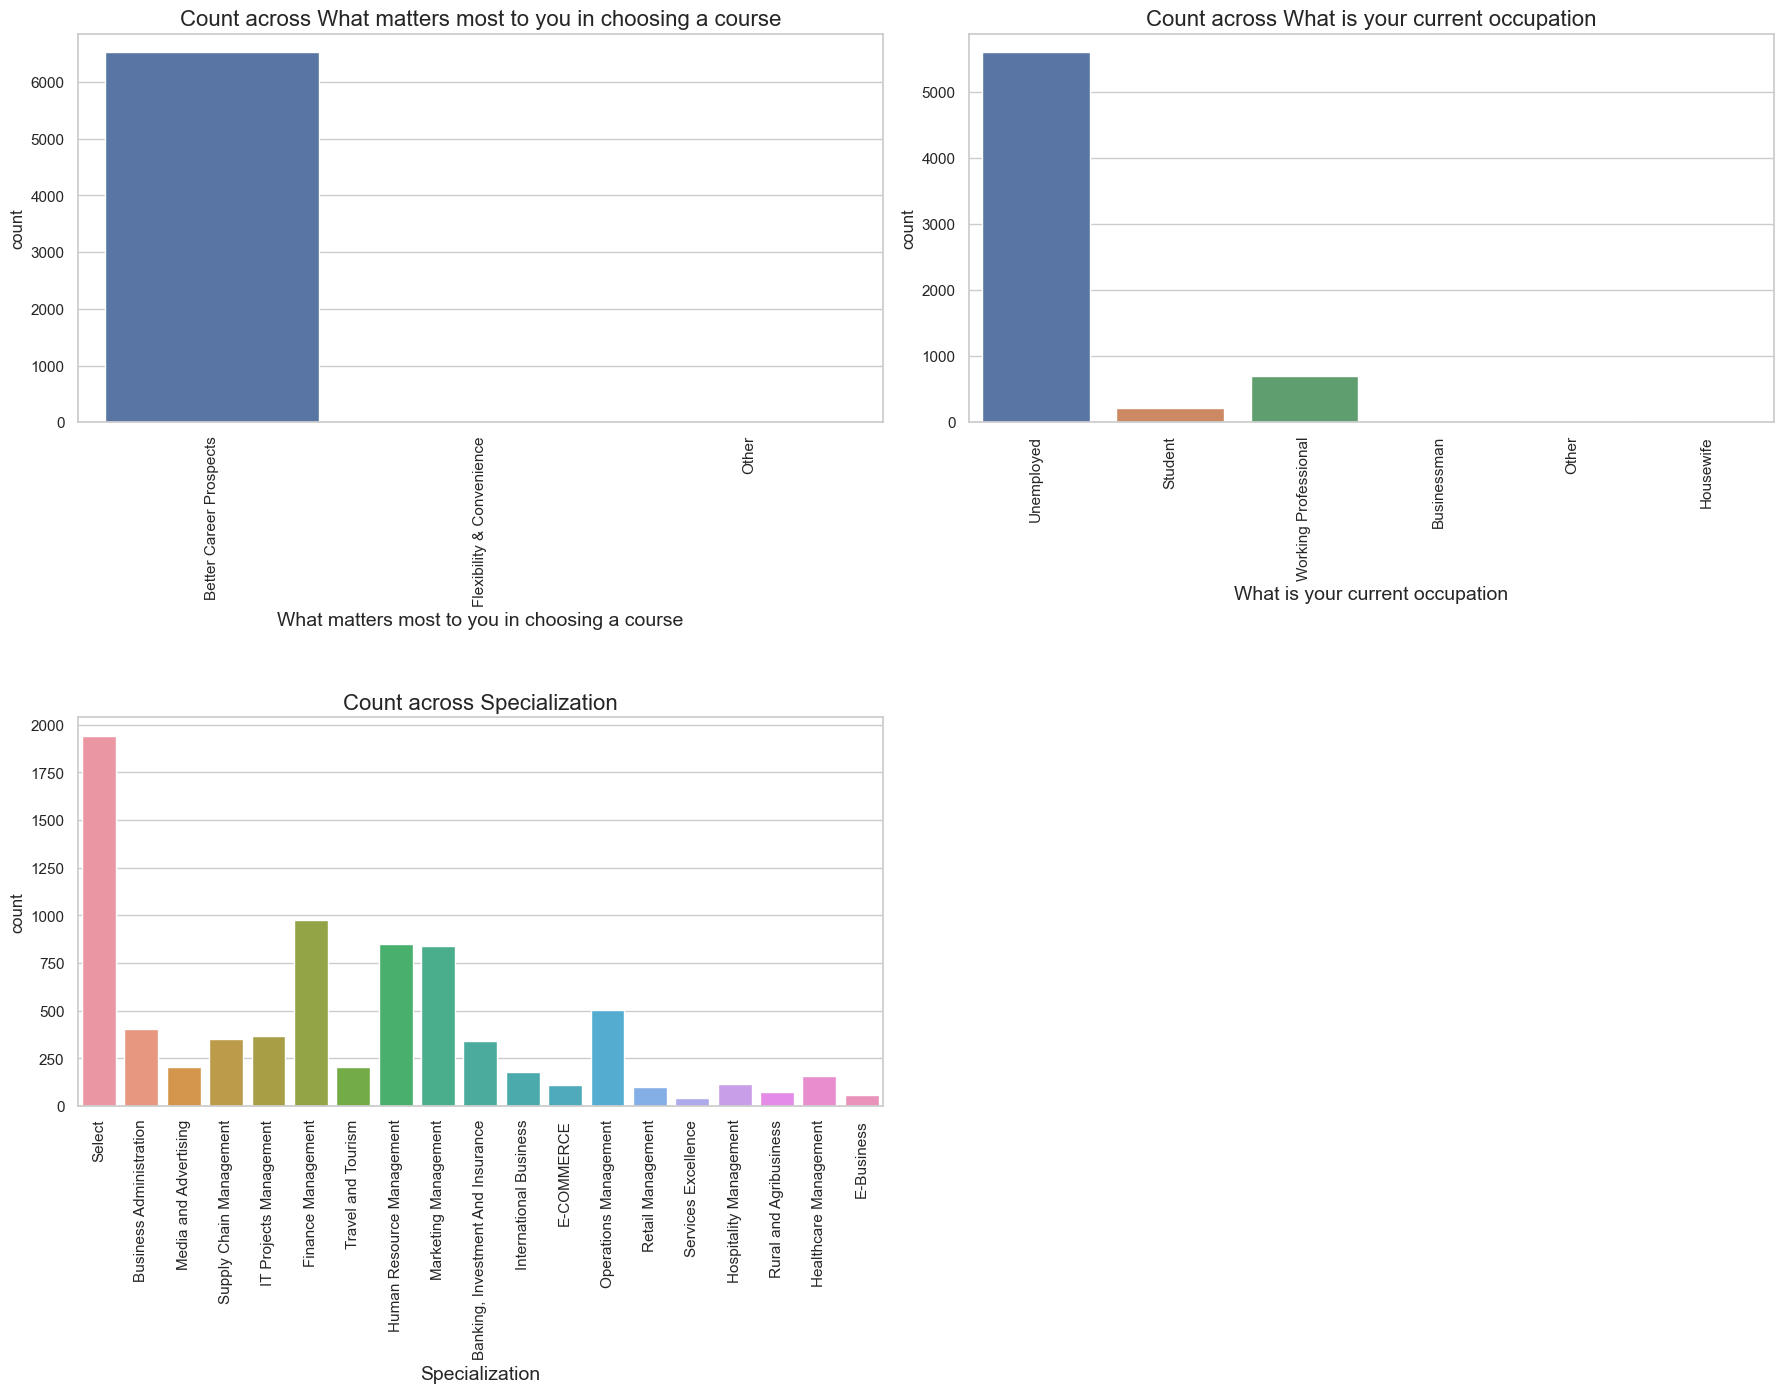

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'leads' is your DataFrame
def countplot(x, fig):
    plt.subplot(4, 2, fig)
    sns.countplot(x=x, data=leads)
    plt.title('Count across ' + x, size=16)
    plt.xlabel(x, size=14)
    plt.xticks(rotation=90)

plt.figure(figsize=(18, 25))

# Ensure that the column names exist in the 'leads' DataFrame
countplot('What matters most to you in choosing a course', 1)
countplot('What is your current occupation', 2)
countplot('Specialization', 3)

plt.tight_layout()
plt.show()

As it can be seen that the levels of "Lead Profile" and "How did you hear about X Education" have a lot of rows which have the value Select which is of no use to the analysis

So it's best that we drop them.

In [35]:
# dropping Lead Profile and How did you hear about X Education cols
leads.drop(['Lead Profile', 'How did you hear about X Education'], axis = 1, inplace = True)

Also we notice that, when we got the value counts of all the columns, there were a few columns in which only one value was majorly present for all the data points. These include Do Not Call, Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, Through Recommendations, Receive More Updates About Our Courses, Update me on Supply Chain Content, Get updates on DM Content, I agree to pay the amount through cheque. Since practically all of the values for these variables are No, it's best that we drop these columns as they won't help with our analysis.

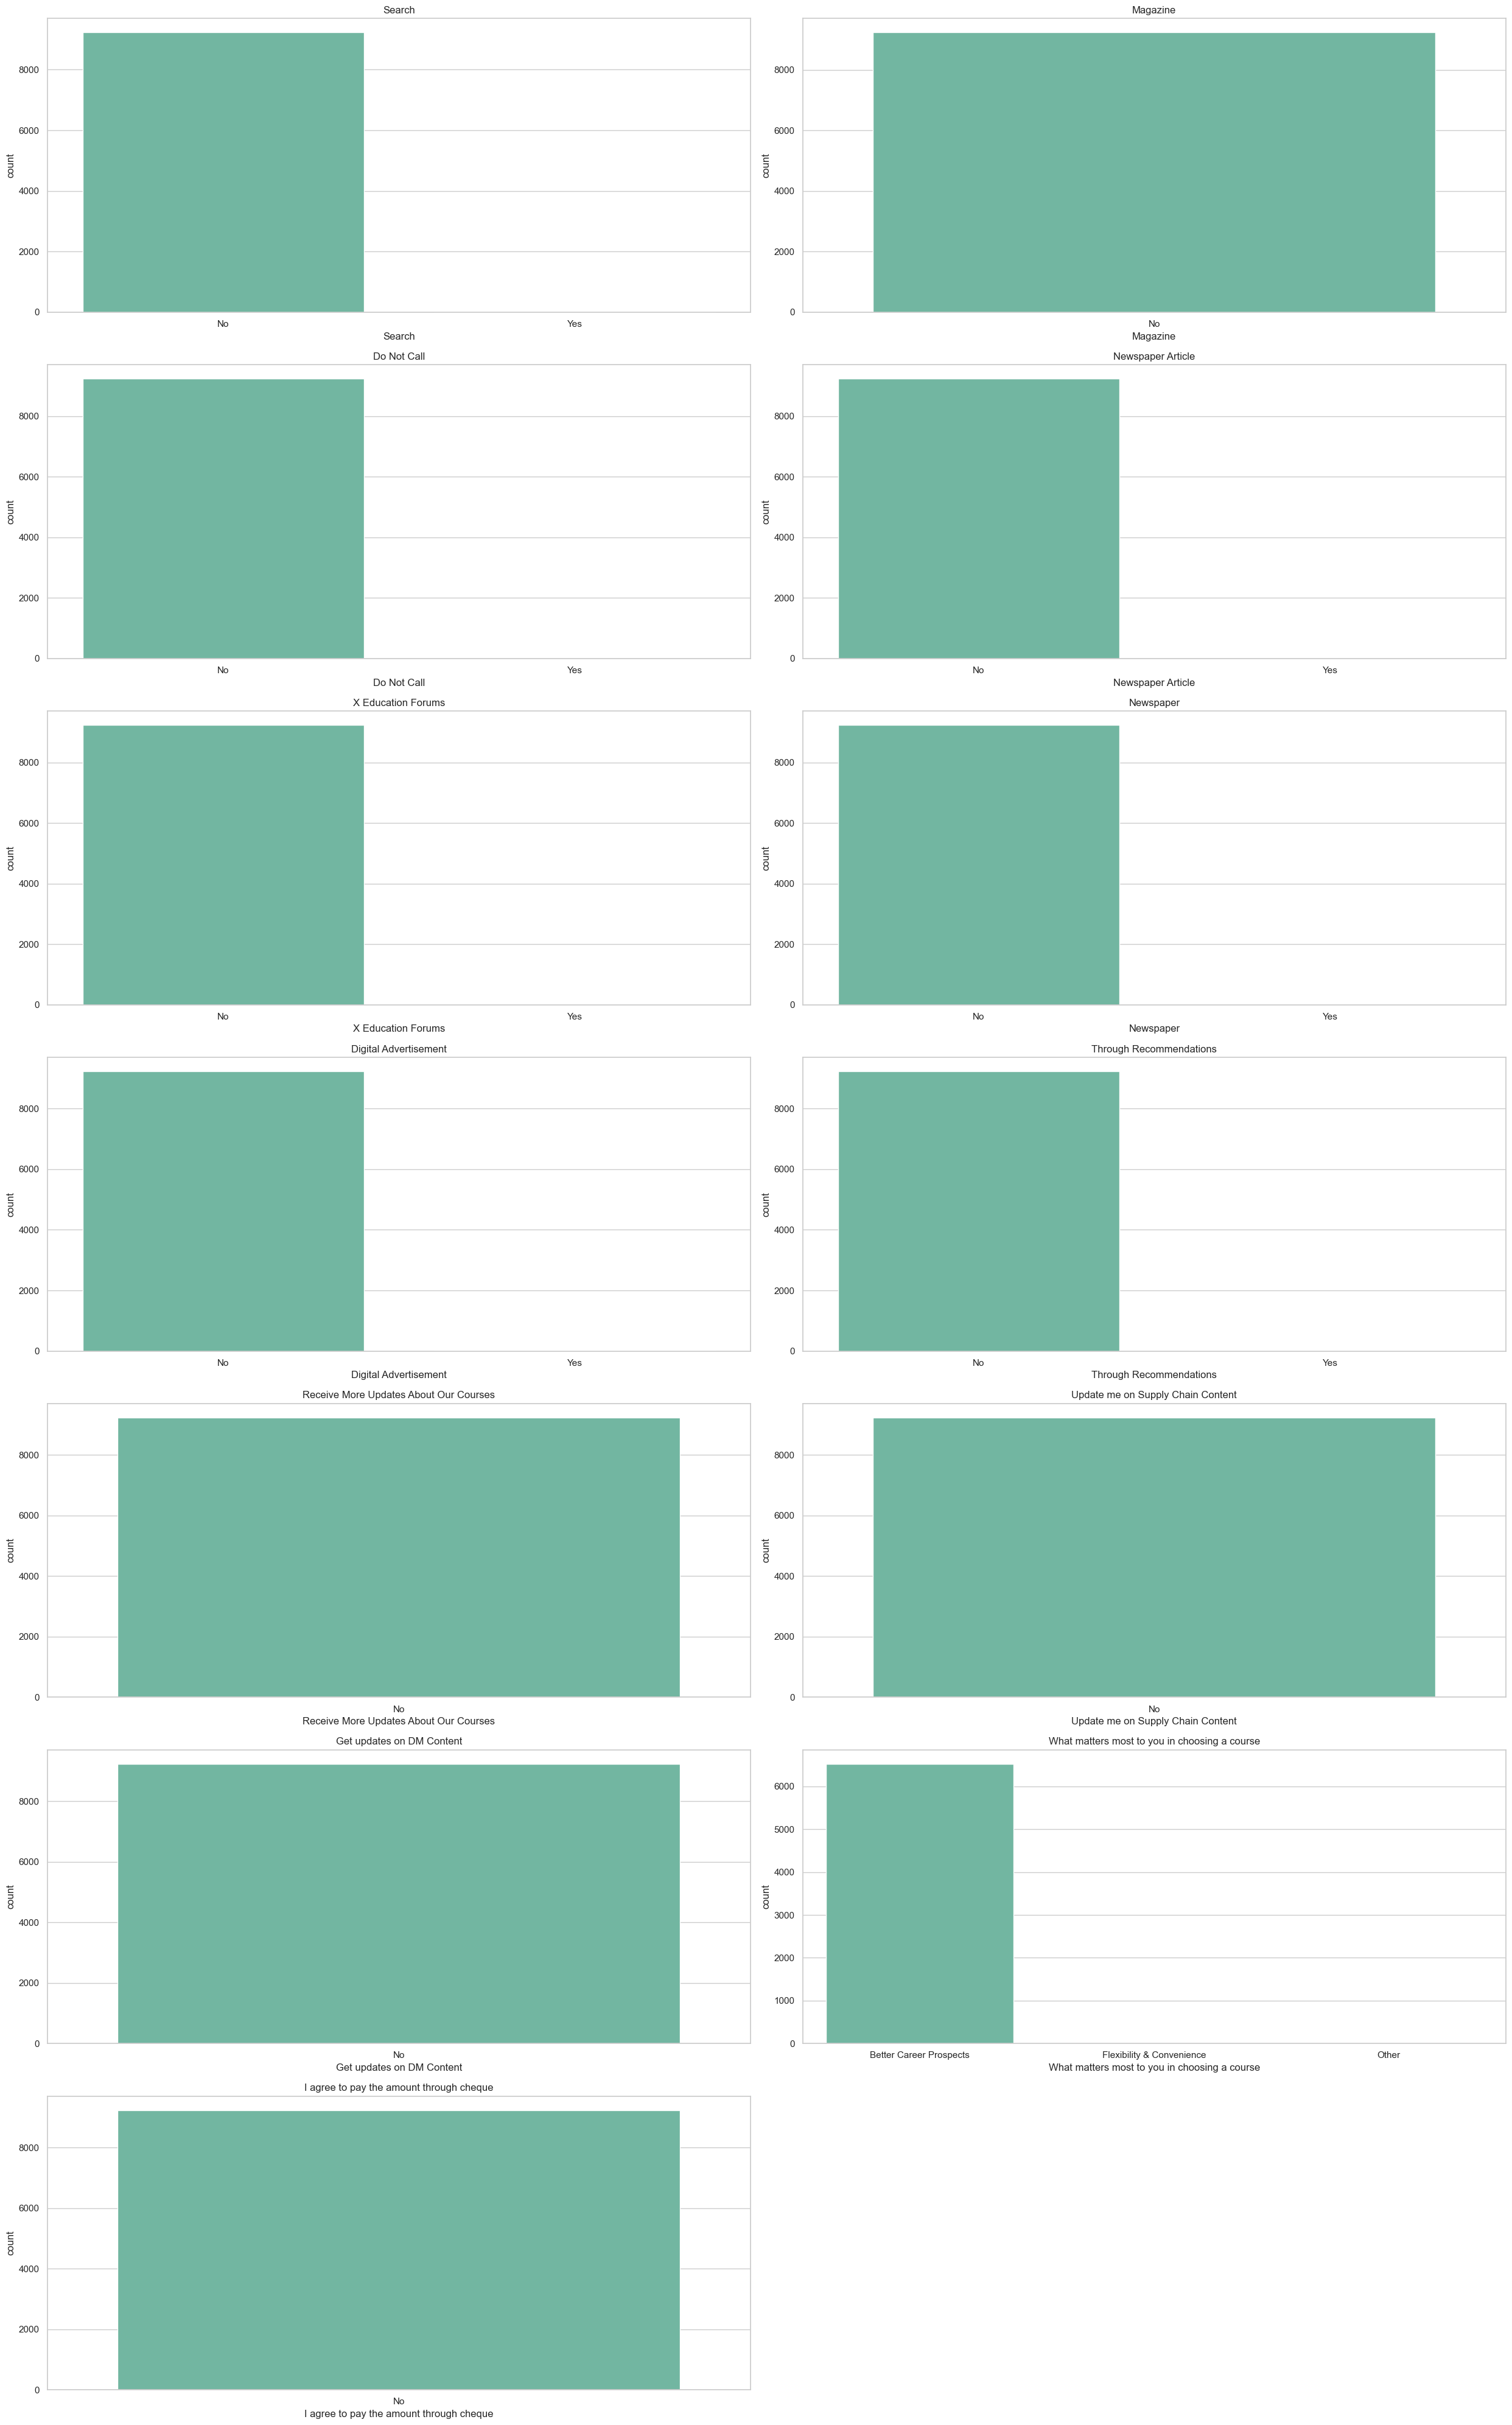

In [37]:
# Plotting each variable
plt.figure(figsize=(25, 40))

# Assuming 'leads' is your DataFrame
plt.subplot(7, 2, 1)
sns.countplot(x='Search', data=leads, palette='Set2')
plt.title('Search')

plt.subplot(7, 2, 2)
sns.countplot(x='Magazine', data=leads, palette='Set2')
plt.title('Magazine')

plt.subplot(7, 2, 3)
sns.countplot(x='Do Not Call', data=leads, palette='Set2')
plt.title('Do Not Call')

plt.subplot(7, 2, 4)
sns.countplot(x='Newspaper Article', data=leads, palette='Set2')
plt.title('Newspaper Article')

plt.subplot(7, 2, 5)
sns.countplot(x='X Education Forums', data=leads, palette='Set2')
plt.title('X Education Forums')

plt.subplot(7, 2, 6)
sns.countplot(x='Newspaper', data=leads, palette='Set2')
plt.title('Newspaper')

plt.subplot(7, 2, 7)
sns.countplot(x='Digital Advertisement', data=leads, palette='Set2')
plt.title('Digital Advertisement')

plt.subplot(7, 2, 8)
sns.countplot(x='Through Recommendations', data=leads, palette='Set2')
plt.title('Through Recommendations')

plt.subplot(7, 2, 9)
sns.countplot(x='Receive More Updates About Our Courses', data=leads, palette='Set2')
plt.title('Receive More Updates About Our Courses')

plt.subplot(7, 2, 10)
sns.countplot(x='Update me on Supply Chain Content', data=leads, palette='Set2')
plt.title('Update me on Supply Chain Content')

plt.subplot(7, 2, 11)
sns.countplot(x='Get updates on DM Content', data=leads, palette='Set2')
plt.title('Get updates on DM Content')

plt.subplot(7, 2, 12)
sns.countplot(x='What matters most to you in choosing a course', data=leads, palette='Set2')
plt.title('What matters most to you in choosing a course')

plt.subplot(7, 2, 13)
sns.countplot(x='I agree to pay the amount through cheque', data=leads, palette='Set2')
plt.title('I agree to pay the amount through cheque')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


When we got the value counts of all the columns, there were a few columns in which only one value was majorly present for all the data points. These include 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations',' Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque' . Since practically all of the values for these variables are No, it's best that we drop these columns as they won't help with our analysis.Along with 'What matters most to you in choosing a course' has the level Better Career Prospects 6528 times while the other two levels appear once twice and once respectively. So we should drop this column as well.

In [39]:
leads.drop(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
            'Update me on Supply Chain Content', 'Get updates on DM Content',
            'What matters most to you in choosing a course', 
            'I agree to pay the amount through cheque'], axis = 1, inplace = True)

In [40]:
leads.shape


(9240, 14)

In [41]:
# Checking the number of null values again

leads.isnull().sum().sort_values()

Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Do Not Email                                 0
Converted                                    0
Total Time Spent on Website                  0
A free copy of Mastering The Interview       0
Last Notable Activity                        0
Lead Source                                 36
Last Activity                              103
TotalVisits                                137
Page Views Per Visit                       137
Specialization                            1438
What is your current occupation           2690
dtype: int64

Now there is a column 'What is your current occupation' has a lot of null values. We just check them by value counts , then we will decide if we need to keep it or drop it.

In [43]:
leads['What is your current occupation'].value_counts()

What is your current occupation
Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

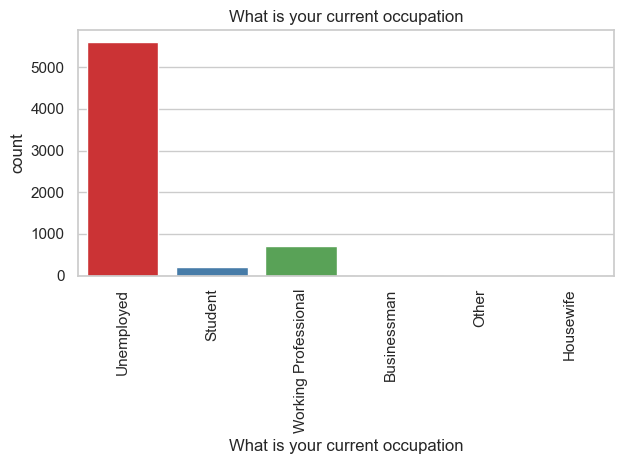

In [44]:
sns.countplot(x='What is your current occupation', data=leads, palette='Set1')
plt.xticks(rotation=90)  # Rotate the x-axis labels
plt.title('What is your current occupation')
plt.tight_layout()
plt.show()


There are lot of values which might be significant in further analysis , so we decide not to drop the entire column as we have already lost a lot of data. So it's better just to eliminate the null value rows.

In [46]:
# Dropping the null values rows in the column 'What is your current occupation'
leads=leads[~pd.isnull(leads['What is your current occupation'])]

In [47]:
# Checking the number of null values again
leads.isnull().sum().sort_values()

Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Do Not Email                                0
Converted                                   0
Total Time Spent on Website                 0
What is your current occupation             0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
Specialization                             18
Lead Source                                36
Last Activity                             103
TotalVisits                               130
Page Views Per Visit                      130
dtype: int64

Since now the number of null values present in the columns are quite small we can simply drop the rows in which these null values are present.

In [49]:
# Drop the null value rows in the column 'Page Views Per Visit '
leads = leads[~pd.isnull(leads['Page Views Per Visit'])]

In [50]:
#Checking the number of null values again
leads.isnull().sum().sort_values()

Prospect ID                                0
Lead Number                                0
Lead Origin                                0
Do Not Email                               0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
Specialization                            18
Lead Source                               29
dtype: int64

In [51]:
# Drop the null values rows in the column 'Lead Source'
leads = leads[~pd.isnull(leads['Lead Source'])]

In [52]:
# Checking the number of null values again
leads.isnull().sum().sort_values()

Prospect ID                                0
Lead Number                                0
Lead Origin                                0
Lead Source                                0
Do Not Email                               0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
Specialization                            18
dtype: int64

In [53]:
# Drop the null values rows in the column 'Specialization'
leads = leads[~pd.isnull(leads['Specialization'])]

In [54]:
# Checking the number of null values again
leads.isnull().sum().sort_values()

Prospect ID                               0
Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

Now our dataset doesn't have any null values. Let's now check the percentage of rows that we have retained.

In [56]:
print(round(100*(len(leads.index)/9240) ,2))

68.97


We still have around 69% of the rows which seems good enough.


In [58]:
# Let's now look at the dataset again
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


Clearly we can say that 'Prospect ID' and 'Lead Number' are of no use ,we can drop them.


In [60]:
# Dropping the "Prospect ID" and "Lead Number" 
leads.drop(['Prospect ID', 'Lead Number'], axis=1, inplace = True)

In [61]:
# Let's now look at the dataset again
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


In [62]:
leads.shape


(6373, 12)

In [63]:
leads.info()


<class 'pandas.core.frame.DataFrame'>
Index: 6373 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             6373 non-null   object 
 1   Lead Source                             6373 non-null   object 
 2   Do Not Email                            6373 non-null   object 
 3   Converted                               6373 non-null   int64  
 4   TotalVisits                             6373 non-null   float64
 5   Total Time Spent on Website             6373 non-null   int64  
 6   Page Views Per Visit                    6373 non-null   float64
 7   Last Activity                           6373 non-null   object 
 8   Specialization                          6373 non-null   object 
 9   What is your current occupation         6373 non-null   object 
 10  A free copy of Mastering The Interview  6373 non-null   object 
 

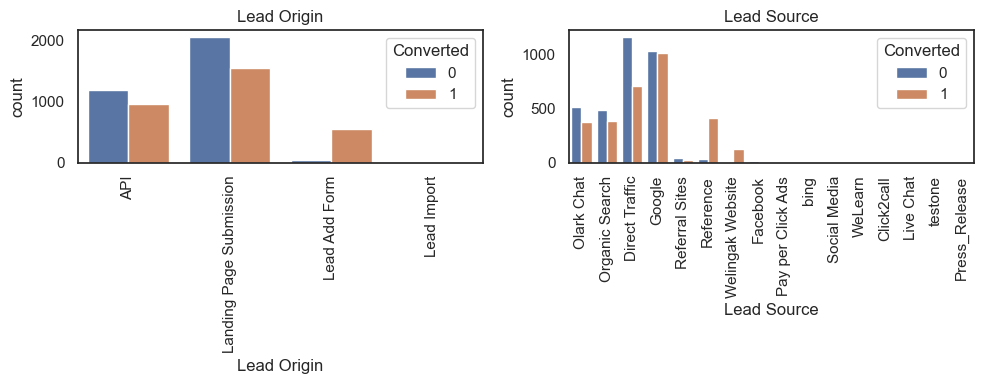

In [64]:
# Convert 'Converted' column to string to avoid legend issues
leads['Converted'] = leads['Converted'].astype(str)

sns.set_style("white")
plt.figure(figsize=(10, 4))

# Plot 1: Lead Origin
plt.subplot(1, 2, 1)
sns.countplot(x='Lead Origin', hue='Converted', data=leads)
plt.xticks(rotation=90)
plt.title('Lead Origin')

# Plot 2: Lead Source
plt.subplot(1, 2, 2)
sns.countplot(x='Lead Source', hue='Converted', data=leads)
plt.xticks(rotation=90)
plt.title('Lead Source')

plt.tight_layout()
plt.show()


Conclusion: In the Lead Origin column most converted leads and most non converted leads are from 'Landing Page Submission Category'. In the Lead Source column most converted leads came from Google and most non converted leads came from Direct Traffic category.

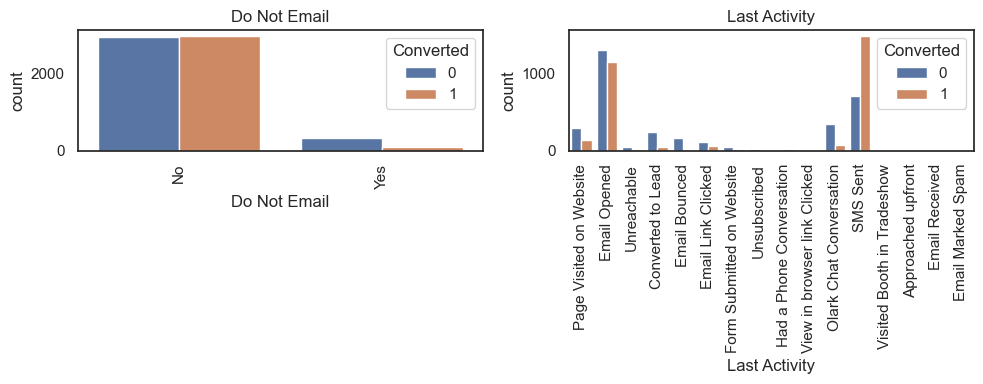

In [66]:
sns.set_style("white")

plt.figure(figsize=(10, 4))

# Plot 1: Do Not Email
plt.subplot(1, 2, 1)
sns.countplot(x='Do Not Email', hue='Converted', data=leads)
plt.xticks(rotation=90)
plt.title('Do Not Email')

# Plot 2: Last Activity
plt.subplot(1, 2, 2)
sns.countplot(x='Last Activity', hue='Converted', data=leads)
plt.xticks(rotation=90)
plt.title('Last Activity')

plt.tight_layout()
plt.show()


In 'Do Not Mail' column most converted and most non converted leads both are from 'No' category. In 'Last Activity' column most converted list are from 'SMS Sent' category and most non converted list are from 'Email Opened' category.

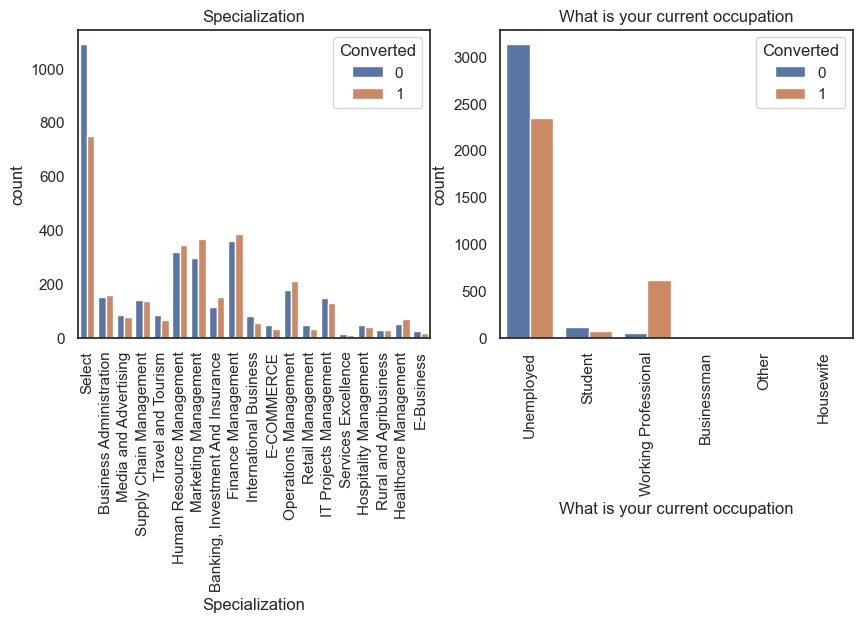

In [68]:
sns.set_style("white")
plt.figure(figsize = (10,4))

plt.subplot(1,2,1)
sns.countplot(x='Specialization', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.subplot(1,2,2)
sns.countplot(x='What is your current occupation', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')
plt.show()

Conclusion: In 'Specialization' column most converted and non converted leads both are from 'Select' category. In 'What is your current occupation' column most converted and non converted leads both are from 'Unemployed' category.

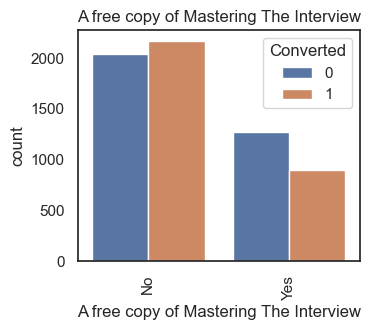

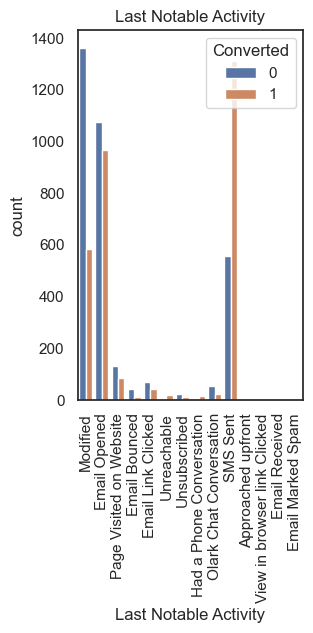

In [70]:
sns.set_style("white")
plt.figure(figsize = (8,3))

plt.subplot(1,2,1)
sns.countplot(x='A free copy of Mastering The Interview', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('A free copy of Mastering The Interview')
plt.show()

plt.subplot(1,2,2)
sns.countplot(x='Last Notable Activity', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')
plt.show()

Conclusion: In 'A free copy of Mastering The Interview' column most converted and non converted leads are from 'No' category .In 'Last Notable Activity' column most converted leads are from 'SMS Sent' category and most non converted leads are from 'Modified' category.

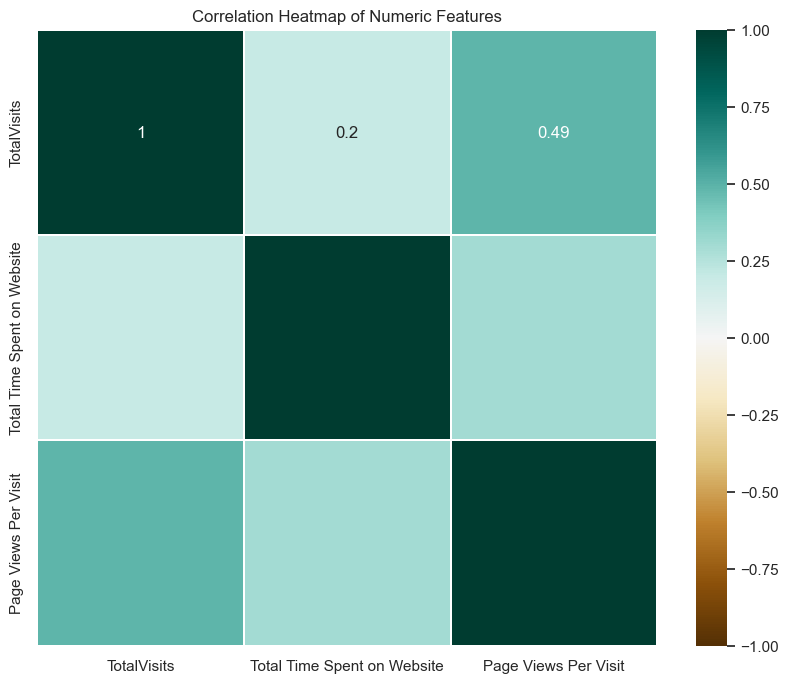

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns from the leads DataFrame
numeric_leads = leads.select_dtypes(include=['number'])

# Observing Correlation
plt.figure(figsize=(10, 8))

# Generate heatmap for numeric columns
sns.heatmap(numeric_leads.corr(), annot=True, cmap="BrBG", robust=True, linewidth=0.1, vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()


## Prepare the data for Modelling


In [74]:
leads.shape


(6373, 12)

In [75]:
leads.columns


Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

Dummy Variable Creation

In the upcoming step we will deal with categorical variable . Let's create dummy variables for them


In [78]:
# Checking the columns which are of type 'object'
col= leads.loc[:, leads.dtypes=='object']
col.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [79]:
# Creating dummy variables using the 'get_dummies' command

dummy=pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)

dummy=dummy.astype('int')

In [80]:
# Add the results to the master dataframe

leads=pd.concat([leads, dummy],axis=1)

In [81]:
leads.head()


,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [82]:
leads.shape


(6373, 83)

In [83]:
# In the column 'Specialization' since it has the level 'Select' which is useless so we drop that level by specifying it explicitly
leads.drop(['Specialization_Select'], axis=1, inplace=True)

In [84]:
leads.shape


(6373, 82)

In [85]:
# Dropping the variables for which the dummy variables have been created

leads = leads.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                   'Specialization', 'What is your current occupation',
                   'A free copy of Mastering The Interview', 'Last Notable Activity'], axis=1)

In [86]:
# Let's take a look at the dataset again

leads.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [87]:
leads.shape


(6373, 74)

## Train Test Split


In [89]:
# Put all the feature variables in X except target variable.
X=leads.drop(['Converted'],axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [90]:
y=leads['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: object

In [91]:
# Spliting the dataset into 70% train and 30% test

X_train, X_test, y_train, y_test= train_test_split(X, y , train_size=0.7, test_size=0.3, random_state=100)

In [92]:
#lets check the shape

print( X_train.shape)
print( y_train.shape)

(4461, 73)
(4461,)


## Feature Scaling


In [94]:
# Scaling the three numeric features present in the dataset

scaler= MinMaxScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]=scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [95]:
X_train.head()


,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
8003,0.015936,0.029489,0.125,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
218,0.015936,0.082306,0.250,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4171,0.023904,0.034331,0.375,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4037,0.000000,0.000000,0.000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3660,0.000000,0.000000,0.000,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


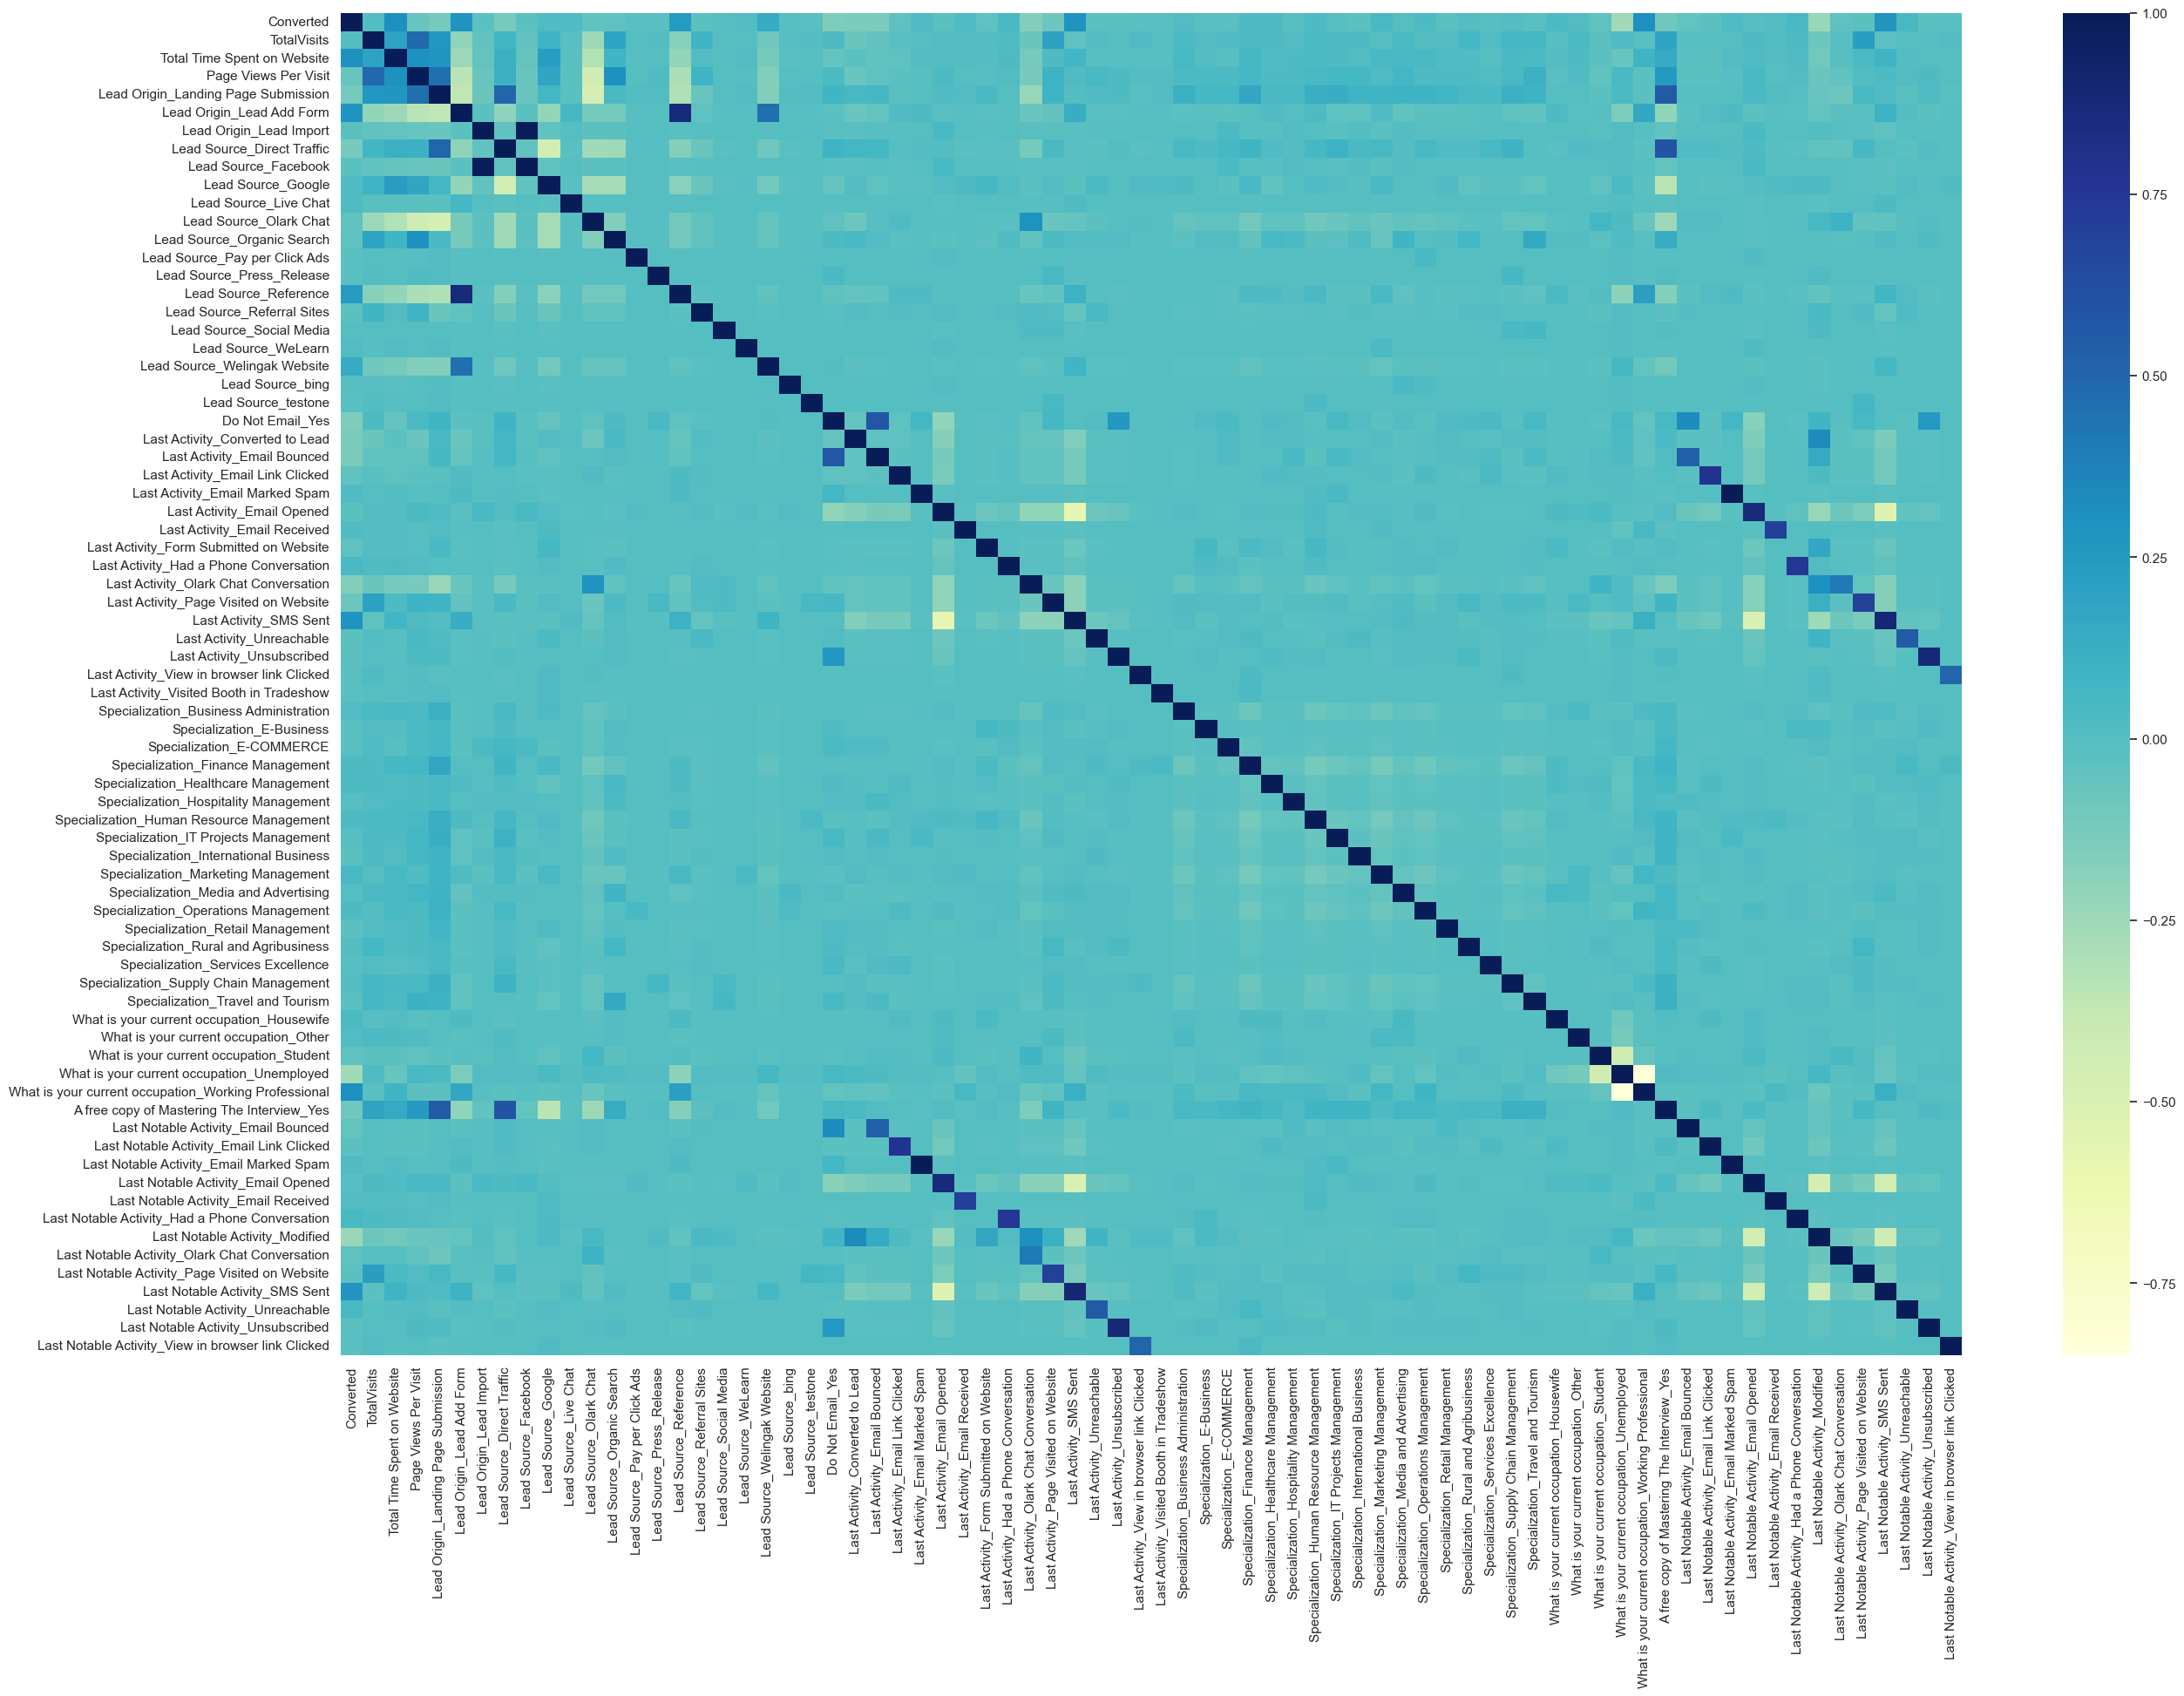

In [96]:
# Looking at the correlation table

plt.figure(figsize = (30,20))
sns.heatmap(leads.corr(), cmap="YlGnBu")
plt.show()

Since the number of variables are pretty high here , but from the above correlation diagram we can say that there are many variables that are highly correlated to each other.

## Model Building


Let's now move to model building. As we can see that there are a lot of variables present in the dataset which we cannot deal with. So the best way to approach this is to select a small set of features from this pool of variables using RFE.

In [100]:
# Importing the 'LogisticRegression' 

lr = LogisticRegression()

In [101]:
# Importing the 'RFE' and select 15 variables

rfe = RFE(estimator=lr,n_features_to_select=15)             
rfe = rfe.fit(X_train, y_train)

In [102]:
# Features have been selected by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 7),
 ('Lead Origin_Landing Page Submission', False, 21),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 55),
 ('Lead Source_Direct Traffic', False, 8),
 ('Lead Source_Facebook', False, 54),
 ('Lead Source_Google', False, 30),
 ('Lead Source_Live Chat', False, 44),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 29),
 ('Lead Source_Pay per Click Ads', False, 38),
 ('Lead Source_Press_Release', False, 52),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 31),
 ('Lead Source_Social Media', False, 59),
 ('Lead Source_WeLearn', False, 41),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 28),
 ('Lead Source_testone', False, 36),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Converted to Lead', False, 10),
 ('Last Activity_Email Bounced', False, 4),
 ('Last Activity_Email Link Cl

In [103]:
# Putting all the columns selected by RFE in the variable 'col'

col = X_train.columns[rfe.support_]

Now we have the variables selected by RFE , now we can proceed towards p-value and the VIFs, let's use these variables to create a logistic regression model using statsmodels.

In [105]:
# Select only the columns selected by RFE

X_train = X_train[col]

## Model 1


In [107]:
# Fit a logistic Regression model on X_train after adding a constant 

# Ensure X_train is numeric
# If there are categorical features, use pd.get_dummies() to one-hot encode them
X_train_numeric = pd.get_dummies(X_train, drop_first=True)

# If y_train is categorical (binary), ensure it's numeric too
# For binary classification, convert the target using LabelEncoder
if y_train.dtype == 'object' or y_train.dtype.name == 'category':
    le = LabelEncoder()
    y_train_numeric = le.fit_transform(y_train)
else:
    y_train_numeric = y_train

# Add constant to X_train
X_train_sm = sm.add_constant(X_train_numeric)

# Fit the logistic regression model
lr2 = sm.GLM(y_train_numeric, X_train_sm, family=sm.families.Binomial())
res = lr2.fit()

# Print summary
print(res.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4445
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2072.8
Date:                Wed, 18 Sep 2024   Deviance:                       4145.5
Time:                        14:14:46   Pearson chi2:                 4.84e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3660
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

There are a lot of variables whose p values are very high.We will need to care them but first let's look at the VIFs values.


In [109]:
# Making a VIF dataframe for all the variables
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,84.19
4,Lead Source_Reference,65.18
5,Lead Source_Welingak Website,20.03
11,What is your current occupation_Unemployed,3.65
7,Last Activity_Had a Phone Conversation,2.44
13,Last Notable Activity_Had a Phone Conversation,2.43
1,Total Time Spent on Website,2.38
0,TotalVisits,1.62
8,Last Activity_SMS Sent,1.59
12,What is your current occupation_Working Professional,1.56


Observation: The VIF values are all good except three variables. We will first drop 'Lead Source_Reference' variable whose VIF and p-value both are high

## Model-2

In [112]:
X_train.drop('Lead Source_Reference', axis = 1, inplace = True)


In [113]:
# Evaluating the model with the new set of features

# Converting categorical variables in X_train to numeric
X_train_numeric = pd.get_dummies(X_train, drop_first=True)

# Converting y_train to numeric if it's categorical
if y_train.dtype == 'object' or y_train.dtype.name == 'category':
    le = LabelEncoder()
    y_train_numeric = le.fit_transform(y_train)
else:
    y_train_numeric = y_train

# Adding a constant to X_train
X_train_sm = sm.add_constant(X_train_numeric)

# Fitting the logistic regression model using GLM
lr3 = sm.GLM(y_train_numeric, X_train_sm, family=sm.families.Binomial())
res = lr3.fit()

# Printing the summary of the model
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4446
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2073.2
Date:                Wed, 18 Sep 2024   Deviance:                       4146.5
Time:                        14:14:47   Pearson chi2:                 4.82e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3658
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [114]:
# Make a VIF dataframe 
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,3.65
6,Last Activity_Had a Phone Conversation,2.44
12,Last Notable Activity_Had a Phone Conversation,2.43
1,Total Time Spent on Website,2.38
2,Lead Origin_Lead Add Form,1.71
0,TotalVisits,1.62
7,Last Activity_SMS Sent,1.59
11,What is your current occupation_Working Professional,1.56
3,Lead Source_Olark Chat,1.44
4,Lead Source_Welingak Website,1.33


Observation: All the VIFs are looking good, now we will drop those variables with high p values.First drop the variable 'Last Notable Activity_Had a Phone Conversation'

## Model-3


In [117]:
X_train.drop('Last Notable Activity_Had a Phone Conversation', axis = 1, inplace = True)

In [118]:
# Refitting the model with the new set of features
# Convert categorical variables in X_train to numeric using one-hot encoding
X_train_numeric = pd.get_dummies(X_train, drop_first=True)

#Converting y_train to numeric if it's categorical
if y_train.dtype == 'object' or y_train.dtype.name == 'category':
    le = LabelEncoder()
    y_train_numeric = le.fit_transform(y_train)
else:
    y_train_numeric = y_train

# Adding a constant to X_train
X_train_sm = sm.add_constant(X_train_numeric)

# Fitting the logistic regression model using GLM
lr3 = sm.GLM(y_train_numeric, X_train_sm, family=sm.families.Binomial())
res = lr3.fit()

# Print the summary of the model
print(res.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4447
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2076.1
Date:                Wed, 18 Sep 2024   Deviance:                       4152.2
Time:                        14:14:47   Pearson chi2:                 4.82e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3650
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [119]:
# Making a VIF dataframe 

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,3.65
1,Total Time Spent on Website,2.38
2,Lead Origin_Lead Add Form,1.71
0,TotalVisits,1.62
7,Last Activity_SMS Sent,1.59
11,What is your current occupation_Working Professional,1.56
3,Lead Source_Olark Chat,1.44
4,Lead Source_Welingak Website,1.33
5,Do Not Email_Yes,1.09
9,What is your current occupation_Student,1.09


Now we have another variable with high p value named 'What is your current occupation_Housewife'. Let's drop it


## Model-4

In [122]:
X_train.drop('What is your current occupation_Housewife', axis=1, inplace=True)

In [123]:
# Refit the model with the new set of features

# Converting categorical variables in X_train to numeric using one-hot encoding
X_train_numeric = pd.get_dummies(X_train, drop_first=True)

# Converting y_train to numeric if it's categorical
if y_train.dtype == 'object' or y_train.dtype.name == 'category':
    le = LabelEncoder()
    y_train_numeric = le.fit_transform(y_train)
else:
    y_train_numeric = y_train

# Adding a constant to X_train
X_train_sm = sm.add_constant(X_train_numeric)

# Fitting the logistic regression model using GLM
lr3 = sm.GLM(y_train_numeric, X_train_sm, family=sm.families.Binomial())
res = lr3.fit()

# Printing the summary of the model
print(res.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4448
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2078.3
Date:                Wed, 18 Sep 2024   Deviance:                       4156.7
Time:                        14:14:47   Pearson chi2:                 4.83e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3644
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [124]:
# Make a VIF dataframe 

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,What is your current occupation_Unemployed,3.64
1,Total Time Spent on Website,2.37
2,Lead Origin_Lead Add Form,1.70
0,TotalVisits,1.62
7,Last Activity_SMS Sent,1.59
10,What is your current occupation_Working Professional,1.56
3,Lead Source_Olark Chat,1.44
4,Lead Source_Welingak Website,1.33
5,Do Not Email_Yes,1.09
8,What is your current occupation_Student,1.09


Observation: Now we have only one variable left with high p value ,'What is your current occupation_Working Professional'. It's time to drop it

## Model-5

In [127]:
X_train.drop('What is your current occupation_Working Professional', axis=1, inplace=True)

In [128]:
# Refit the model with the new set of features
# Converting categorical variables in X_train to numeric using one-hot encoding
X_train_numeric = pd.get_dummies(X_train, drop_first=True)

# Converting y_train to numeric if it's categorical
if y_train.dtype == 'object' or y_train.dtype.name == 'category':
    le = LabelEncoder()
    y_train_numeric = le.fit_transform(y_train)
else:
    y_train_numeric = y_train

# Adding a constant to X_train
X_train_sm = sm.add_constant(X_train_numeric)

# Fitting the logistic regression model using GLM
lr3 = sm.GLM(y_train_numeric, X_train_sm, family=sm.families.Binomial())
res = lr3.fit()

# Printing the summary of the model
print(res.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4449
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2079.1
Date:                Wed, 18 Sep 2024   Deviance:                       4158.1
Time:                        14:14:47   Pearson chi2:                 4.80e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3642
Covariance Type:            nonrobust                                         
                                                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [129]:
# Make a VIF dataframe 

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,What is your current occupation_Unemployed,2.82
1,Total Time Spent on Website,2.00
0,TotalVisits,1.54
7,Last Activity_SMS Sent,1.51
2,Lead Origin_Lead Add Form,1.45
3,Lead Source_Olark Chat,1.33
4,Lead Source_Welingak Website,1.30
5,Do Not Email_Yes,1.08
8,What is your current occupation_Student,1.06
6,Last Activity_Had a Phone Conversation,1.01


## Model Evaluation

Now, both the p-values and VIFs seem decent enough for all the variables. So let's go ahead and make predictions using this final set of features

In [132]:
# Use 'predict' to predict the probabilities on the train set

y_train_pred = res.predict(sm.add_constant(X_train))
y_train_pred[:10]

8003    0.300117
218     0.142002
4171    0.127629
4037    0.291558
3660    0.954795
207     0.194426
2044    0.178073
6411    0.949460
6498    0.075995
2085    0.982316
dtype: float64

In [133]:
# Reshaping it into an array

y_train_pred=y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.30011695, 0.14200165, 0.12762885, 0.29155814, 0.95479546,
       0.19442563, 0.17807328, 0.94946006, 0.07599465, 0.98231619])

Creating a dataframe with actual Converted value and its Predicted probabilities


In [135]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Converted_Prob
0,0,0.300117
1,0,0.142002
2,1,0.127629
3,1,0.291558
4,1,0.954795


Creating new column 'Predicted' with 1 if Converted_Prob >0.5 else 0


In [137]:
y_train_pred_final['Predicted']=y_train_pred_final.Converted_Prob.map(lambda x:1 if x>0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Predicted
0,0,0.300117,0
1,0,0.142002,0
2,1,0.127629,0
3,1,0.291558,0
4,1,0.954795,1


## Creating the Confusion Matrix


In [139]:
# Convert labels to the same type (e.g., integer)
y_true = y_train_pred_final['Converted'].astype(int)
y_pred = y_train_pred_final['Predicted'].astype(int)

# Compute the confusion matrix
confusion = metrics.confusion_matrix(y_true, y_pred)
print(confusion)


# confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
# print(confusion)

[[1929  383]
 [ 560 1589]]


In [140]:
# Let's check the overall accuracy

# Convert labels to the same type (e.g., integer)
y_true = y_train_pred_final['Converted'].astype(int)
y_pred = y_train_pred_final['Predicted'].astype(int)

# Compute the accuracy score
accuracy = metrics.accuracy_score(y_true, y_pred)
print(accuracy)


0.7886124187401928


In [141]:
# Let's evaluate the other metrics 

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [142]:
# 'Sensitivity'

TP/(TP+FN)

0.739413680781759

In [143]:
# 'Specificity'

TN/(TN+FP)

0.8343425605536332

## Finding the Optimal Cutoff

##### We choose 0.5 just to check model performance .But in order to get good results we need to calculate the threshold.So first let's plot an ROC curve to see what AUC we get.

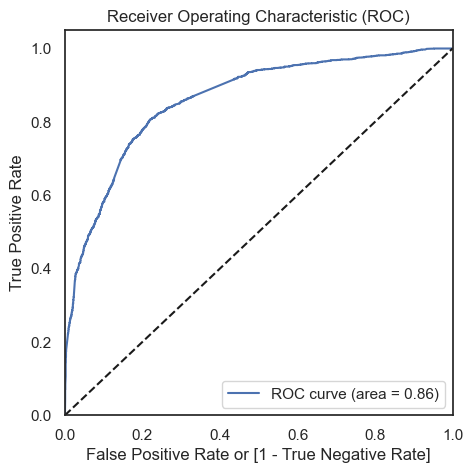

In [146]:
# Defining the ROC function
def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate=False)
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

# Converting the labels to numeric
y_true = y_train_pred_final['Converted'].astype(int)
y_probs = y_train_pred_final['Converted_Prob'].astype(float)  # Ensure probabilities are floats

# Calling the ROC function
draw_roc(y_true, y_probs)


Conclusion: The are under the curve of ROC is 0.86 which is pretty good, so it looks like a good model.Let's also check the sensitivity and specificity tradeoff to find the optimal cutoff point.

In [148]:
# Let's create columns with different  cutoffs

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.300117,0,1,1,1,1,0,0,0,0,0,0
1,0,0.142002,0,1,1,0,0,0,0,0,0,0,0
2,1,0.127629,0,1,1,0,0,0,0,0,0,0,0
3,1,0.291558,0,1,1,1,0,0,0,0,0,0,0
4,1,0.954795,1,1,1,1,1,1,1,1,1,1,1


Let's see the values of accuracy, sensitivity, and specificity at different values of probability cutoffs


In [150]:
cutoff_df = pd.DataFrame(columns=['prob', 'accuracy', 'sensi', 'speci'])
num = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

for i in num:
    # Convert both to integer or consistent types (assuming y_train_pred_final[i] contains probabilities)
    y_pred = (y_train_pred_final[i] >= i).astype(int)
    y_true = y_train_pred_final.Converted.astype(int)
    
    # Calculate confusion matrix
    conf = metrics.confusion_matrix(y_true, y_pred)
    
    # Compute total, accuracy, specificity, and sensitivity
    total = sum(sum(conf))
    accuracy = (conf[0, 0] + conf[1, 1]) / total
    speci = conf[0, 0] / (conf[0, 0] + conf[0, 1])
    sensi = conf[1, 1] / (conf[1, 0] + conf[1, 1])
    
    # Store the results in the DataFrame
    cutoff_df.loc[i] = [i, accuracy, sensi, speci]

print(cutoff_df)


     prob  accuracy     sensi     speci
0.0   0.0  0.481731  1.000000  0.000000
0.1   0.1  0.527012  0.994416  0.092561
0.2   0.2  0.698274  0.944160  0.469723
0.3   0.3  0.767541  0.865984  0.676038
0.4   0.4  0.791975  0.810610  0.774654
0.5   0.5  0.788612  0.739414  0.834343
0.6   0.6  0.757229  0.624011  0.881055
0.7   0.7  0.735037  0.543509  0.913062
0.8   0.8  0.711500  0.453234  0.951557
0.9   0.9  0.644026  0.279665  0.982699


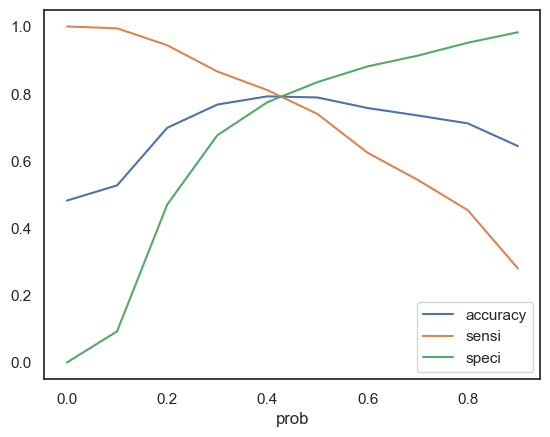

In [151]:
# Let's plot it as well

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

As we can see that around 0.42 or 0.43, So let's choose 0.42 as our cutoff now.


In [153]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.42 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.300117,0,1,1,1,1,0,0,0,0,0,0,0
1,0,0.142002,0,1,1,0,0,0,0,0,0,0,0,0
2,1,0.127629,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.291558,0,1,1,1,0,0,0,0,0,0,0,0
4,1,0.954795,1,1,1,1,1,1,1,1,1,1,1,1


In [154]:
# Let's check the Accuracy

# Ensure both columns are of the same type (int or str)
accuracy = metrics.accuracy_score(y_train_pred_final.Converted.astype(int), 
                                  y_train_pred_final.final_predicted.astype(int))

print("Accuracy:", accuracy)


Accuracy: 0.7908540685944856


In [155]:
# Let's create the confusion matrix  again
# Ensuring both columns are of the same type (either int or str)
y_true = y_train_pred_final.Converted.astype(int)  
y_pred = y_train_pred_final.final_predicted.astype(int) 

# Compute confusion matrix
confusion2 = metrics.confusion_matrix(y_true, y_pred)

# Display confusion matrix
print(confusion2)


[[1823  489]
 [ 444 1705]]


In [156]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] 
TN = confusion2[0,0] 
FP = confusion2[0,1] 
FN = confusion2[1,0]

In [157]:
# Calculating 'Sensitivity'

TP/(TP+FN)

0.793392275476966

In [158]:
# Calculating 'Specificity'

TN/(TN+FP)

0.7884948096885813

We we choose random value 0.5 we got sensitivity and specificity value 0.73 and 0.83 respectively. After prediction of the cutoff value we got value of 0.79 and 0.78 respectively, which are pretty good.Now we can move towards the Test set.

## Making Predictions on the Test Set

In [161]:
# Scaling the test set l using 'transform'

X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] =  scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [162]:
# Selecting the columns for X_test 

X_test = X_test[col]
X_test.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable
4771,0.000000,0.000000,1,0,1,0,0,0,1,0,0,0,1,0,0
6122,0.027888,0.029049,0,0,0,0,0,0,0,0,0,1,0,0,0
9202,0.015936,0.416813,0,0,0,0,0,0,1,0,0,1,0,0,0
6570,0.011952,0.378961,0,0,0,0,1,0,1,0,0,1,0,0,0
2668,0.031873,0.395246,0,0,0,0,0,0,1,0,0,1,0,0,0


In [163]:
# Adding a constant to X_test

X_test_sm = sm.add_constant(X_test[col])

In [164]:
X_test_sm

,const,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable
4771,1.0,0.000000,0.000000,1,0,1,0,0,0,1,0,0,0,1,0,0
6122,1.0,0.027888,0.029049,0,0,0,0,0,0,0,0,0,1,0,0,0
9202,1.0,0.015936,0.416813,0,0,0,0,0,0,1,0,0,1,0,0,0
6570,1.0,0.011952,0.378961,0,0,0,0,1,0,1,0,0,1,0,0,0
2668,1.0,0.031873,0.395246,0,0,0,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5828,1.0,0.011952,0.027289,0,0,0,0,0,0,1,0,0,1,0,0,0
6583,1.0,0.011952,0.152289,0,0,0,0,0,0,1,0,0,1,0,0,0
5531,1.0,0.055777,0.702025,0,0,0,0,0,0,0,0,0,1,0,0,0
3056,1.0,0.011952,0.417694,0,0,0,0,1,0,1,0,0,1,0,0,0


In [165]:
# Drop the required columns from X_test as well

X_test.drop(['Lead Source_Reference', 'What is your current occupation_Housewife', 
             'What is your current occupation_Working Professional', 'Last Notable Activity_Had a Phone Conversation'], axis=1, inplace = True)

In [166]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(sm.add_constant(X_test))

In [167]:
y_test_pred[:10]


4771    0.996296
6122    0.129992
9202    0.703937
6570    0.299564
2668    0.720796
4233    0.792250
3368    0.704038
9091    0.464521
5972    0.282978
3631    0.786460
dtype: float64

In [168]:
# Converting y_pred to a dataframe

y_pred = pd.DataFrame(y_test_pred)

In [169]:
y_pred.head()


,0
4771,0.996296
6122,0.129992
9202,0.703937
6570,0.299564
2668,0.720796


In [170]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [171]:
#Remove index for both dataframes

y_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [172]:
# Concat two dataframe

y_pred_final = pd.concat([y_test_df, y_pred],axis=1)

In [173]:
y_pred_final.head()


,Converted,0
0,1,0.996296
1,0,0.129992
2,0,0.703937
3,1,0.299564
4,1,0.720796


In [174]:
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [175]:
y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.996296
1,0,0.129992
2,0,0.703937
3,1,0.299564
4,1,0.720796


In [176]:
# Make predictions on the test set using 0.42 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [177]:
y_pred_final.head()


,Converted,Conversion_Prob,final_predicted
0,1,0.996296,1
1,0,0.129992,0
2,0,0.703937,1
3,1,0.299564,0
4,1,0.720796,1


In [178]:
# Let's check the overall accuracy

# Ensuring both 'Converted' and 'final_predicted' are of the same type (e.g., int or str)
accuracy = metrics.accuracy_score(y_pred_final['Converted'].astype(int), 
                                  y_pred_final['final_predicted'].astype(int))

print("Accuracy:", accuracy)


Accuracy: 0.7845188284518828


In [179]:
# Ensuring both 'Converted' and 'final_predicted' are of the same type 
y_true = y_pred_final['Converted'].astype(int)  # or .astype(str) if needed
y_pred = y_pred_final['final_predicted'].astype(int)  # or .astype(str) if needed

# Compute confusion matrix
confusion2 = metrics.confusion_matrix(y_true, y_pred)

# Display confusion matrix
print(confusion2)


[[786 210]
 [202 714]]


In [180]:
TP = confusion2[1,1] 
TN = confusion2[0,0] 
FP = confusion2[0,1] 
FN = confusion2[1,0] 

In [181]:
# Calculating the 'sensitivity'

TP /(TP+FN)

0.7794759825327511

In [182]:
# Calculating the 'specificity'

TN /(TN+FP)

0.7891566265060241

### Precision-Recall View


In [184]:
# Ensuring both 'Converted' and 'Predicted' are of the same type
y_true = y_train_pred_final.Converted.astype(int)  
y_pred = y_train_pred_final.Predicted.astype(int) 

# Compute confusion matrix
confusion = metrics.confusion_matrix(y_true, y_pred)

# Display the confusion matrix
print(confusion)


[[1929  383]
 [ 560 1589]]


Precision = TP / TP + FP

In [186]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])


0.739413680781759

Recall = TP / TP + FN

In [188]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])


0.739413680781759

### Precision and recall tradeoff


In [190]:
y_train_pred_final.Converted, y_train_pred_final.Predicted


(0       0
 1       0
 2       1
 3       1
 4       1
        ..
 4456    1
 4457    0
 4458    0
 4459    0
 4460    0
 Name: Converted, Length: 4461, dtype: object,
 0       0
 1       0
 2       0
 3       0
 4       1
        ..
 4456    1
 4457    1
 4458    1
 4459    0
 4460    0
 Name: Predicted, Length: 4461, dtype: int64)

In [191]:

# Ensuring 'Converted' is binary and 'Converted_Prob' is the predicted probabilities
y_true = y_train_pred_final.Converted.astype(int) 
y_prob = y_train_pred_final.Converted_Prob  

# Computing precision-recall curve
p, r, thresholds = precision_recall_curve(y_true, y_prob)

# Print the results
print("Precision:", p)
print("Recall:", r)
print("Thresholds:", thresholds)


Precision: [0.48173055 0.48183857 0.48194662 ... 1.         1.         1.        ]
Recall: [1.00000000e+00 1.00000000e+00 1.00000000e+00 ... 9.30665426e-04
 4.65332713e-04 0.00000000e+00]
Thresholds: [0.02260784 0.02294664 0.02365534 ... 0.99945219 0.99971868 0.99986416]


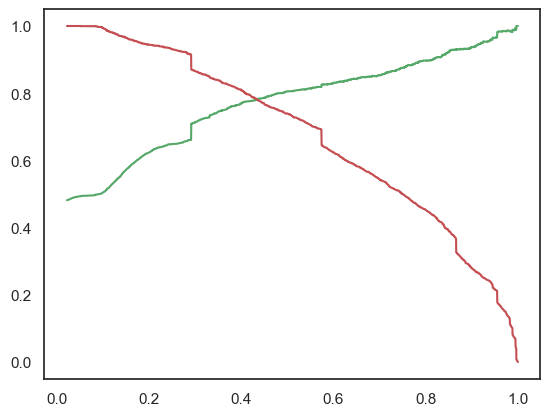

In [192]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [193]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.44 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.300117,0,1,1,1,1,0,0,0,0,0,0,0
1,0,0.142002,0,1,1,0,0,0,0,0,0,0,0,0
2,1,0.127629,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.291558,0,1,1,1,0,0,0,0,0,0,0,0
4,1,0.954795,1,1,1,1,1,1,1,1,1,1,1,1


In [194]:
# Let's check the 'accuracy' now

# Ensuring both 'Converted' and 'final_predicted' are of the same type
y_true = y_train_pred_final.Converted.astype(int) 
y_pred = y_train_pred_final.final_predicted.astype(int) 

# Calculating accuracy score
accuracy = accuracy_score(y_true, y_pred)

# Display accuracy
print("Accuracy:", accuracy)


Accuracy: 0.7895090786819099


In [195]:
# Let's create the confusion matrix once again

# Ensuring both 'Converted' and 'final_predicted' are of the same type 
y_true = y_train_pred_final.Converted.astype(int)  
y_pred = y_train_pred_final.final_predicted.astype(int) 

# Computing confusion matrix
confusion2 = confusion_matrix(y_true, y_pred)

# Displaying confusion matrix
print(confusion2)


[[1852  460]
 [ 479 1670]]


In [196]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] 
TN = confusion2[0,0] 
FP = confusion2[0,1] 
FN = confusion2[1,0] 

Precision

In [198]:
TP/(TP+FP)


0.784037558685446

Recall

In [200]:
TP/(TP+FN)


0.7771056305258259

Making Prediction on Test Set using 0.44 as cutoff

In [202]:
# Making predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(sm.add_constant(X_test))

In [203]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [204]:
y_pred_1.head()


,0
4771,0.996296
6122,0.129992
9202,0.703937
6570,0.299564
2668,0.720796


In [205]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [206]:
# Removing index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [207]:
# Concat y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [208]:
y_pred_final.head()


,Converted,0
0,1,0.996296
1,0,0.129992
2,0,0.703937
3,1,0.299564
4,1,0.720796


In [209]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Converted_Prob'})

In [210]:
y_pred_final.head()

,Converted,Converted_Prob
0,1,0.996296
1,0,0.129992
2,0,0.703937
3,1,0.299564
4,1,0.720796


In [211]:
# Making predictions on the test set using 0.44 as the cutoff
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.44 else 0)

In [212]:
y_pred_final.head()


,Converted,Converted_Prob,final_predicted
0,1,0.996296,1
1,0,0.129992,0
2,0,0.703937,1
3,1,0.299564,0
4,1,0.720796,1


In [213]:
# Let's check the overall accuracy
# Ensuring both 'Converted' and 'final_predicted' are of the same type
y_true = y_pred_final['Converted'].astype(int) 
y_pred = y_pred_final['final_predicted'].astype(int) 

# Calculating accuracy score
accuracy = accuracy_score(y_true, y_pred)

# Displaying the accuracy
print("Accuracy:", accuracy)


Accuracy: 0.7866108786610879


In [214]:
# Ensuring both 'Converted' and 'final_predicted' are of the same type
y_true = y_pred_final['Converted'].astype(int)  
y_pred = y_pred_final['final_predicted'].astype(int) 

# Computing the confusion matrix
confusion2 = confusion_matrix(y_true, y_pred)

# Displaying the confusion matrix
print(confusion2)


[[801 195]
 [213 703]]


In [215]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [216]:
# Calculating the Precision

TP/(TP+FP)

0.7828507795100222

In [217]:
# Calculating Recall

TP/(TP+FN)

0.767467248908297

#### With the current cut-off 0.44 we got Precision around 78% and Recall around 76%

## Recommendation

To improve the potential lead conversion rate X-Education will have to mainly focus important features responsible for good conversion rate are :-

- Lead Source_Welingak Website : As conversion rate is higher for those leads who got to know about course from 'Welingak Website',so company can focus on this website to get more number of potential leads.

- Lead Origin_Lead Add Form: Leads who have engaged through 'Lead Add Form' having higher conversion rate so company can focus on it to get more number of leads cause  have a higher chances of getting converted.

- What is your current occupation_Working Professional : The lead whose occupation is 'Working Professional' having higher lead conversion rate ,company should focus on working profesanonals nad try to get more number of leads.
- Last Activity_SMS Sent: Lead whose last activity is sms sent can be potential lead for company.

- Total Time Spent on website: Leads spending more time on website can be our potential lead.